In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

## **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__results__.html', '__notebook__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [21]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

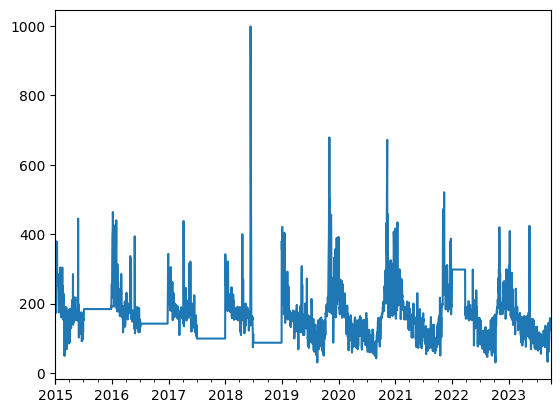

In [22]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

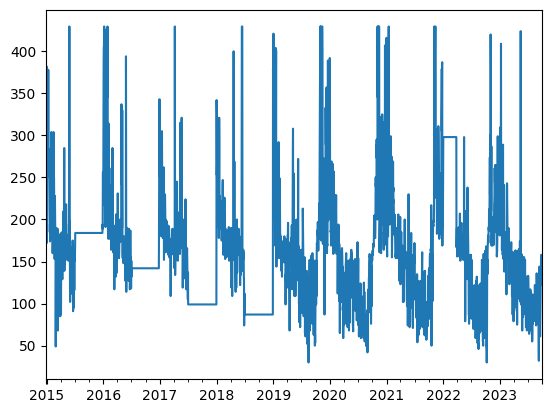

In [23]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

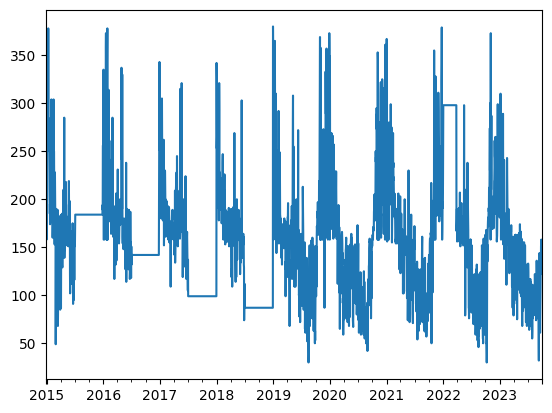

In [24]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

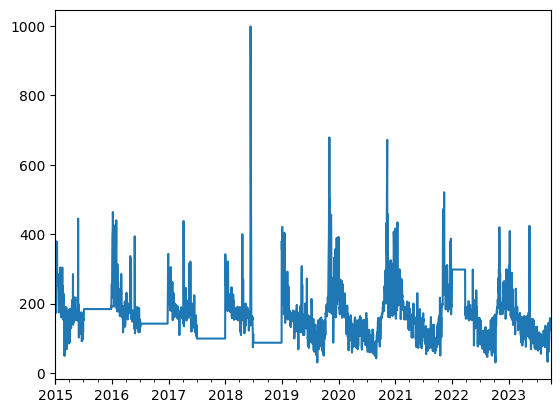

In [25]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

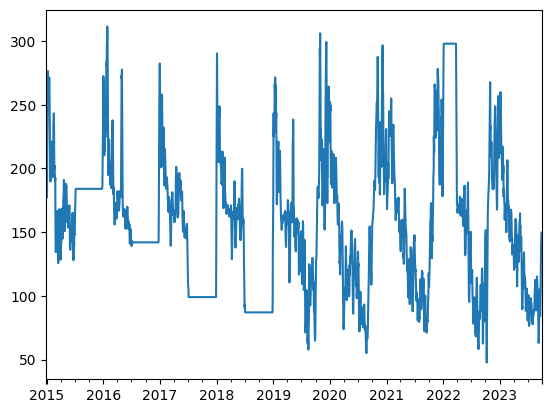

In [26]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2.1. Splitting & Preprocessing the Raw Data(AQI_Smooth)**

Smooth AQI(All Pollutants)

In [27]:
new_data4.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0
2015-01-03,14.3,27.8,5.2,98.0,179.0,5.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,179.0,179.0,179.0,179.0
2015-01-04,12.6,19.5,5.9,120.0,195.0,2.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,195.0,195.0,195.0,195.0
2015-01-05,13.1,19.1,8.4,114.0,185.0,2.5,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,185.0,185.0,185.0,185.0


In [28]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

In [29]:
aqi_normal = new_data4.copy()

In [30]:
aqi_normal = aqi_normal.drop([ 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 
        'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'], axis = 1)

In [31]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [32]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [33]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct)

In [34]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2553, 6, 6) (2553,)
Validation shapes: (313, 6, 6) (313,)
Test shapes: (315, 6, 6) (315,)


# **2.2. Model Training & Testing**

In [35]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM(Normal)(Learning Rate Test)

## Model 1

In [36]:
model1 = Sequential()
model1.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model1.add(LSTM(16)) 
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, 'linear')) 

#model1.summary()

cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), 
               metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp1])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 28762.6855 - root_mean_squared_error: 169.5674 - val_loss: 25517.4746 - val_root_mean_squared_error: 159.7419
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14173.7461 - root_mean_squared_error: 118.5038 - val_loss: 8527.0078 - val_root_mean_squared_error: 92.3418
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5679.8726 - root_mean_squared_error: 74.8097 - val_loss: 5760.0034 - val_root_mean_squared_error: 75.8947
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3480.3684 - root_mean_squared_error: 58.8093 - val_loss: 4292.4082 - val_root_mean_squared_error: 65.5165
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3676.1980 - root_mean_squared_error: 60.3261 - val_loss: 3927.2712 - val_root_mean_squared_error: 62.6679
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2765.4717 - root_mean_squared_error: 52.4440 - val_loss: 3685.4956 - val_root_mean_squared_error: 60.7083
Epoch 7/50

In [37]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/model1.keras')

In [38]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 27.6063
Mean Squared Error (MSE): 1979.8049
Root Mean Squared Error (RMSE): 44.4950
R-squared (Accuracy): 0.6166


In [39]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 19.1290
Mean Squared Error (MSE): 837.7150
Root Mean Squared Error (RMSE): 28.9433
R-squared (Accuracy): 0.8874


In [40]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 29.6967
Mean Squared Error (MSE): 1749.1364
Root Mean Squared Error (RMSE): 41.8227
R-squared (Accuracy): 0.4707


## Model 2

In [41]:
model2 = Sequential()
model2.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model2.add(LSTM(16)) 
model2.add(Dense(8, activation='relu')) 
model2.add(Dense(1, 'linear'))

#model1.summary()

cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)

model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp2])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 31333.7812 - root_mean_squared_error: 177.0088 - val_loss: 39625.7188 - val_root_mean_squared_error: 199.0621
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32284.8262 - root_mean_squared_error: 179.6366 - val_loss: 39542.5000 - val_root_mean_squared_error: 198.8530
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33051.8203 - root_mean_squared_error: 181.7275 - val_loss: 39446.4688 - val_root_mean_squared_error: 198.6113
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31597.0098 - root_mean_squared_error: 177.7417 - val_loss: 39374.8359 - val_root_mean_squared_error: 198.4309
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30763.0527 - root_mean_squared_error: 175.3133 - val_loss: 39298.2930 - val_root_mean_squared_error: 198.2380
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32158.0254 - root_mean_squared_error: 179.2622 - val_loss: 39185.5117 - val_root_mean_squared_error: 1

In [42]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/model2.keras')

In [43]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 136.2501
Mean Squared Error (MSE): 23740.3111
Root Mean Squared Error (RMSE): 154.0789
R-squared (Accuracy): -3.5973


In [44]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 153.6293
Mean Squared Error (MSE): 31042.5630
Root Mean Squared Error (RMSE): 176.1890
R-squared (Accuracy): -3.1734


In [45]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 119.3424
Mean Squared Error (MSE): 17547.7692
Root Mean Squared Error (RMSE): 132.4680
R-squared (Accuracy): -4.3102


## Model 3

In [46]:
model3 = Sequential()
model3.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model3.add(LSTM(16)) 
model3.add(Dense(8, activation='relu')) 
model3.add(Dense(1, 'linear'))

#model1.summary()

cp3 = ModelCheckpoint('/kaggle/working/model3.keras', save_best_only=True)

model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp3])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 31476.4668 - root_mean_squared_error: 177.4005 - val_loss: 39644.5469 - val_root_mean_squared_error: 199.1094
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31244.3477 - root_mean_squared_error: 176.7288 - val_loss: 38957.5039 - val_root_mean_squared_error: 197.3766
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31089.1582 - root_mean_squared_error: 176.2933 - val_loss: 37952.0508 - val_root_mean_squared_error: 194.8129
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29077.4512 - root_mean_squared_error: 170.5131 - val_loss: 36119.9961 - val_root_mean_squared_error: 190.0526
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29020.0801 - root_mean_squared_error: 170.1913 - val_loss: 33599.4062 - val_root_mean_squared_error: 183.3014
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26565.0332 - root_mean_squared_error: 162.7892 - val_loss: 30795.7188 - val_root_mean_squared_error: 

In [47]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/model3.keras')

In [48]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 21.6522
Mean Squared Error (MSE): 1807.9346
Root Mean Squared Error (RMSE): 42.5198
R-squared (Accuracy): 0.6499


In [49]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 25.3804
Mean Squared Error (MSE): 1035.7333
Root Mean Squared Error (RMSE): 32.1828
R-squared (Accuracy): 0.8608


In [50]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 24.6218
Mean Squared Error (MSE): 1249.5496
Root Mean Squared Error (RMSE): 35.3490
R-squared (Accuracy): 0.6219


## Model 4

In [51]:
model4 = Sequential()
model4.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model4.add(LSTM(16)) 
model4.add(Dense(8, activation='relu')) 

model4.add(Dense(1, 'linear')) 

#model1.summary()

cp4 = ModelCheckpoint('/kaggle/working/model4.keras', save_best_only=True)

model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp4])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 32500.4902 - root_mean_squared_error: 180.2264 - val_loss: 39634.0117 - val_root_mean_squared_error: 199.0829
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31356.0469 - root_mean_squared_error: 177.0504 - val_loss: 39393.1641 - val_root_mean_squared_error: 198.4771
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31713.1094 - root_mean_squared_error: 178.0467 - val_loss: 38990.4492 - val_root_mean_squared_error: 197.4600
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29801.3535 - root_mean_squared_error: 172.6156 - val_loss: 38406.1133 - val_root_mean_squared_error: 195.9748
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29832.3848 - root_mean_squared_error: 172.6904 - val_loss: 37767.8320 - val_root_mean_squared_error: 194.3395
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29463.1074 - root_mean_squared_error: 171.6241 - val_loss: 37069.6680 - val_root_mean_squared_error: 1

In [52]:
from tensorflow.keras.models import load_model
model4 = load_model('/kaggle/working/model4.keras')

In [53]:
# Evaluate the model on the train data
train_result = model4.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 27.7113
Mean Squared Error (MSE): 2892.0305
Root Mean Squared Error (RMSE): 53.7776
R-squared (Accuracy): 0.4400


In [54]:
# Evaluate the model on the validation data
val_result = model4.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 46.6199
Mean Squared Error (MSE): 3758.0068
Root Mean Squared Error (RMSE): 61.3026
R-squared (Accuracy): 0.4948


In [55]:
# Evaluate the model on the test data
test_result = model4.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 28.3745
Mean Squared Error (MSE): 1566.2940
Root Mean Squared Error (RMSE): 39.5764
R-squared (Accuracy): 0.5260


# Model Testing(Simple, Complex, Hybrid)

## Model 5: Basic LSTM Model

In [56]:
model5 = Sequential()
model5.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model5.add(LSTM(32, activation='relu', return_sequences=False))  # Single LSTM layer
model5.add(Dense(16, activation='relu')) 
model5.add(Dense(1, activation='linear'))  

cp5 = ModelCheckpoint('/kaggle/working/model5.keras', save_best_only=True)

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp5])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10205.4883 - root_mean_squared_error: 98.0867 - val_loss: 1133.3068 - val_root_mean_squared_error: 33.6646
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2331.1616 - root_mean_squared_error: 48.1599 - val_loss: 1274.2771 - val_root_mean_squared_error: 35.6970
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2263.6650 - root_mean_squared_error: 47.5223 - val_loss: 1176.6412 - val_root_mean_squared_error: 34.3022
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2493.7322 - root_mean_squared_error: 49.7269 - val_loss: 1224.6084 - val_root_mean_squared_error: 34.9944
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1611.7687 - root_mean_squared_error: 40.0218 - val_loss: 1283.7371 - val_root_mean_squared_error: 35.8293
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2241.7336 - root_mean_squared_error: 47.2988 - val_loss: 1138.7526 - val_root_mean_squared_error: 33.7454
Epoch 7/50
80/8

In [57]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/model5.keras')

In [58]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.8502
Mean Squared Error (MSE): 1473.6904
Root Mean Squared Error (RMSE): 38.3887
R-squared (Accuracy): 0.7146


In [59]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 17.8269
Mean Squared Error (MSE): 752.8210
Root Mean Squared Error (RMSE): 27.4376
R-squared (Accuracy): 0.8988


In [60]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.8299
Mean Squared Error (MSE): 1130.2437
Root Mean Squared Error (RMSE): 33.6191
R-squared (Accuracy): 0.6580


## Model 6: GRU Model with Dropout

In [61]:
model6 = Sequential()
model6.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model6.add(BatchNormalization())  # Normalize inputs
model6.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model6.add(Dropout(0.3))  # Dropout for regularization
model6.add(Dense(32, activation='relu'))  
model6.add(Dense(1, activation='linear'))  

cp6 = ModelCheckpoint('/kaggle/working/model6.keras', save_best_only=True)

model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp6])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 29273.7988 - root_mean_squared_error: 171.0753 - val_loss: 20444.9004 - val_root_mean_squared_error: 142.9857
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16875.2148 - root_mean_squared_error: 129.7946 - val_loss: 13006.3477 - val_root_mean_squared_error: 114.0454
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10504.3857 - root_mean_squared_error: 102.4017 - val_loss: 10980.0283 - val_root_mean_squared_error: 104.7856
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8552.8096 - root_mean_squared_error: 92.4491 - val_loss: 10539.0488 - val_root_mean_squared_error: 102.6599
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7978.8535 - root_mean_squared_error: 88.9590 - val_loss: 9031.8184 - val_root_mean_squared_error: 95.0359
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6724.5342 - root_mean_squared_error: 81.9555 - val_loss: 9206.4688 - val_root_mean_squared_error: 95.9503
E

## Model 7: Bidirectional LSTM

In [62]:
model7 = Sequential()
model7.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model7.add(BatchNormalization())  # Normalize inputs
model7.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model7.add(Dropout(0.3)) 
model7.add(Dense(32, activation='relu'))  
model7.add(Dense(1, activation='linear'))  

cp7 = ModelCheckpoint('/kaggle/working/model7.keras', save_best_only=True)

model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp7])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5488.4224 - root_mean_squared_error: 73.9952 - val_loss: 7765.8545 - val_root_mean_squared_error: 88.1241
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5678.1582 - root_mean_squared_error: 75.2618 - val_loss: 7583.2046 - val_root_mean_squared_error: 87.0816
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5114.9189 - root_mean_squared_error: 71.3216 - val_loss: 7530.1685 - val_root_mean_squared_error: 86.7765
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5494.2812 - root_mean_squared_error: 74.0884 - val_loss: 7784.3540 - val_root_mean_squared_error: 88.2290
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5789.4634 - root_mean_squared_error: 76.0133 - val_loss: 7632.9346 - val_root_mean_squared_error: 87.3667
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5318.3501 - root_mean_squared_error: 72.7930 - val_loss: 7668.9507 - val_root_mean_squared_error: 87.5725
Epoch 7/50
80/80

## Model 8: Hybrid CNN + LSTM

In [63]:
model8 = Sequential()
model8.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model8.add(Conv1D(32, kernel_size=2, activation='relu'))  # 1D Convolutional Layer
model8.add(MaxPooling1D(pool_size=2))  # Max Pooling
model8.add(LSTM(64, activation='relu', return_sequences=False))  
model8.add(Dropout(0.3))  
model8.add(Dense(32, activation='relu'))  
model8.add(Dense(1, activation='linear'))  

cp8 = ModelCheckpoint('/kaggle/working/model8.keras', save_best_only=True)

model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model8.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp8])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 19235.6289 - root_mean_squared_error: 136.3952 - val_loss: 2208.4917 - val_root_mean_squared_error: 46.9946
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3790.8242 - root_mean_squared_error: 61.5038 - val_loss: 1509.3297 - val_root_mean_squared_error: 38.8501
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3372.7078 - root_mean_squared_error: 57.8305 - val_loss: 1643.3850 - val_root_mean_squared_error: 40.5387
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4721.5591 - root_mean_squared_error: 67.2630 - val_loss: 1614.2570 - val_root_mean_squared_error: 40.1778
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3013.3792 - root_mean_squared_error: 54.7178 - val_loss: 1512.1401 - val_root_mean_squared_error: 38.8862
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2686.3054 - root_mean_squared_error: 51.6625 - val_loss: 1653.4980 - val_root_mean_squared_error: 40.6632
Epoch 7/50
80/

In [64]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/model8.keras')

In [65]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 26.0504
Mean Squared Error (MSE): 2392.0836
Root Mean Squared Error (RMSE): 48.9089
R-squared (Accuracy): 0.5368


In [66]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 26.7656
Mean Squared Error (MSE): 1292.9731
Root Mean Squared Error (RMSE): 35.9579
R-squared (Accuracy): 0.8262


In [67]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 25.4069
Mean Squared Error (MSE): 1354.1258
Root Mean Squared Error (RMSE): 36.7984
R-squared (Accuracy): 0.5902


## Model 9: Advanced Stacked GRU + Dense

In [68]:
model9 = Sequential()
model9.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model9.add(BatchNormalization())  # Normalize inputs
model9.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model9.add(Dropout(0.3))  # Dropout for regularization
model9.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model9.add(Dense(32, activation='relu'))  # Fully connected layer
model9.add(Dense(16, activation='relu'))  # Second dense layer
model9.add(Dense(1, activation='linear'))  # Output layer

cp9 = ModelCheckpoint('/kaggle/working/model9.keras', save_best_only=True)

model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model9.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp9])


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 22017.4316 - root_mean_squared_error: 146.8064 - val_loss: 2522.8403 - val_root_mean_squared_error: 50.2279
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2432.7490 - root_mean_squared_error: 49.2795 - val_loss: 1345.9034 - val_root_mean_squared_error: 36.6866
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2669.7822 - root_mean_squared_error: 51.5689 - val_loss: 1324.4277 - val_root_mean_squared_error: 36.3927
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2154.3364 - root_mean_squared_error: 45.9776 - val_loss: 1057.6637 - val_root_mean_squared_error: 32.5217
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2362.3853 - root_mean_squared_error: 48.4443 - val_loss: 1201.3478 - val_root_mean_squared_error: 34.6605
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2358.1458 - root_mean_squared_error: 48.3422 - val_loss: 1251.1982 - val_root_mean_squared_error: 35.3723
Epoch 7/

In [69]:
from tensorflow.keras.models import load_model
model9 = load_model('/kaggle/working/model9.keras')

In [70]:
# Evaluate the model on the train data
train_result = model9.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.8576
Mean Squared Error (MSE): 1444.6461
Root Mean Squared Error (RMSE): 38.0085
R-squared (Accuracy): 0.7202


In [71]:
# Evaluate the model on the validation data
val_result = model9.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 18.0966
Mean Squared Error (MSE): 779.4857
Root Mean Squared Error (RMSE): 27.9193
R-squared (Accuracy): 0.8952


In [72]:
# Evaluate the model on the test data
test_result = model9.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 23.2258
Mean Squared Error (MSE): 1234.1593
Root Mean Squared Error (RMSE): 35.1306
R-squared (Accuracy): 0.6265


In [73]:
train_predictions = model9.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Train Predictions,Actuals
0,209.770020,195.0
1,205.361832,185.0
2,205.258316,208.0
3,234.353806,290.0
4,278.202667,267.0
...,...,...
2548,412.711212,387.0
2549,332.411560,169.0
2550,207.676361,197.0
2551,241.613510,191.0


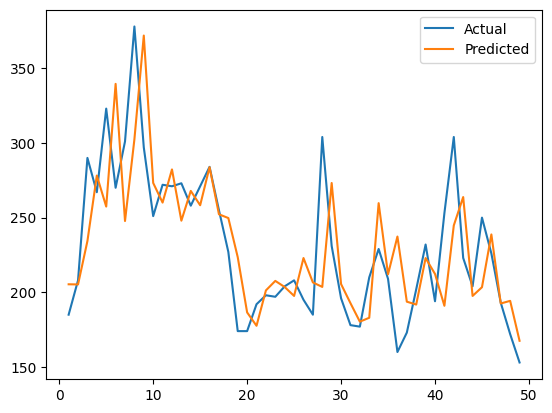

In [74]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [75]:
val_predictions = model9.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Train Predictions,Actuals
0,295.479797,298.0
1,296.607086,298.0
2,295.771088,298.0
3,295.771088,298.0
4,295.771088,298.0
...,...,...
308,180.555374,193.0
309,234.312881,199.0
310,210.094925,197.0
311,211.776443,197.0


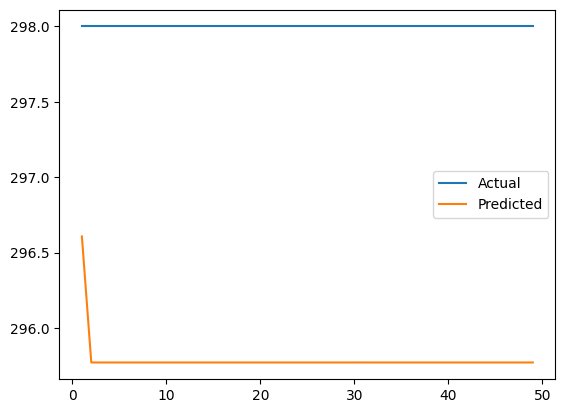

In [76]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [77]:
test_predictions = model9.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Train Predictions,Actuals
0,214.500671,190.0
1,206.562180,177.0
2,199.587402,172.0
3,200.681412,170.0
4,193.117355,197.0
...,...,...
310,147.218613,134.0
311,146.559372,144.0
312,154.520004,155.0
313,160.294739,155.0


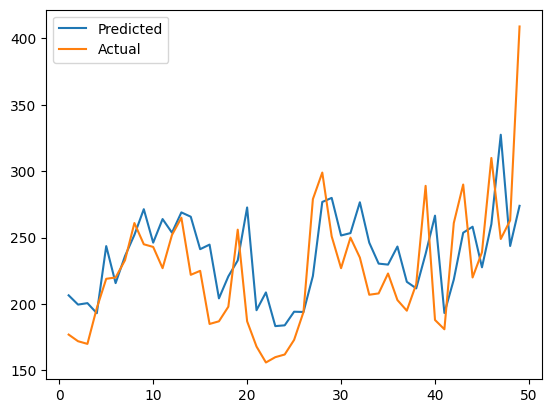

In [78]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# Scaled

In [79]:
aqi_normal = new_data4.copy()

In [80]:
aqi_normal = aqi_normal.drop([ 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 
            'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'], axis = 1)

In [81]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aqi_normal)

In [83]:
scaled_data

array([[ 1.48621623,  2.74469329, -1.25497378, ...,  2.26279232,
        -0.43326169,  1.98028148],
       [ 3.24224486,  2.8245568 , -0.89599505, ...,  3.18463324,
         0.27208393,  2.80479557],
       [ 1.09598764,  1.74639945, -0.22290992, ...,  0.6495707 ,
         0.49250443,  0.53738181],
       ...,
       [ 0.09254271, -0.51639992, -0.17803757, ..., -0.07253803,
        -0.74185039, -0.10848757],
       [-0.04682464, -0.5297105 , -0.11072906, ..., -0.07253803,
        -0.74185039, -0.10848757],
       [-0.15831852, -0.60957401, -0.02098438, ..., -0.11863007,
        -1.0504391 , -0.14971327]])

In [84]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [85]:
WINDOW_SIZE = 4
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    scaled_data, WINDOW_SIZE, train_pct, val_pct, test_pct)

In [86]:
model10 = Sequential()
model10.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model10.add(BatchNormalization())  # Normalize inputs
model10.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model10.add(Dropout(0.3))  # Dropout for regularization
model10.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model10.add(Dense(32, activation='relu'))  # Fully connected layer
model10.add(Dense(16, activation='relu'))  # Second dense layer
model10.add(Dense(1, activation='linear'))  # Output layer

cp10 = ModelCheckpoint('/kaggle/working/model10.keras', save_best_only=True)

model10.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model10.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp10])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.7160 - root_mean_squared_error: 0.8392 - val_loss: 0.1954 - val_root_mean_squared_error: 0.4420
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4126 - root_mean_squared_error: 0.6408 - val_loss: 0.1817 - val_root_mean_squared_error: 0.4263
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3198 - root_mean_squared_error: 0.5642 - val_loss: 0.1652 - val_root_mean_squared_error: 0.4065
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3616 - root_mean_squared_error: 0.5998 - val_loss: 0.1901 - val_root_mean_squared_error: 0.4360
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3466 - root_mean_squared_error: 0.5870 - val_loss: 0.1652 - val_root_mean_squared_error: 0.4064
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2917 - root_mean_squared_error: 0.5387 - val_loss: 0.1690 - val_root_mean_squared_error: 0.4111
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 

In [87]:
from tensorflow.keras.models import load_model
model10 = load_model('/kaggle/working/model10.keras')

In [88]:
# Evaluate the model on the train data
train_result = model10.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2370
Mean Squared Error (MSE): 0.1691
Root Mean Squared Error (RMSE): 0.4112
R-squared (Accuracy): 0.8265


In [89]:
# Evaluate the model on the validation data
val_result = model10.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2283
Mean Squared Error (MSE): 0.1351
Root Mean Squared Error (RMSE): 0.3676
R-squared (Accuracy): 0.9043


In [90]:
# Evaluate the model on the test data
test_result = model10.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.3148
Mean Squared Error (MSE): 0.2248
Root Mean Squared Error (RMSE): 0.4741
R-squared (Accuracy): 0.6393


In [91]:
train_predictions = model10.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,0.932000,0.125125
1,0.057113,0.221318
2,0.255342,0.441188
3,0.253415,0.303769
4,0.669289,0.619833
...,...,...
2550,2.688711,3.079634
2551,1.638267,0.083899
2552,0.514453,0.468672
2553,0.570027,0.386221


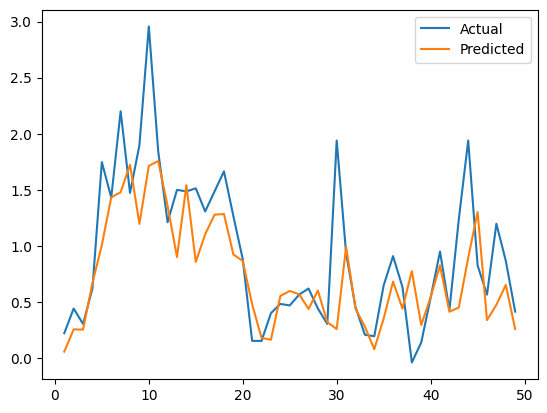

In [92]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [93]:
val_predictions = model10.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,1.720211,1.856604
1,1.779905,1.856604
2,1.861052,1.856604
3,1.861052,1.856604
4,1.861052,1.856604
...,...,...
310,0.516217,0.413705
311,1.009800,0.496156
312,0.501800,0.468672
313,0.761325,0.468672


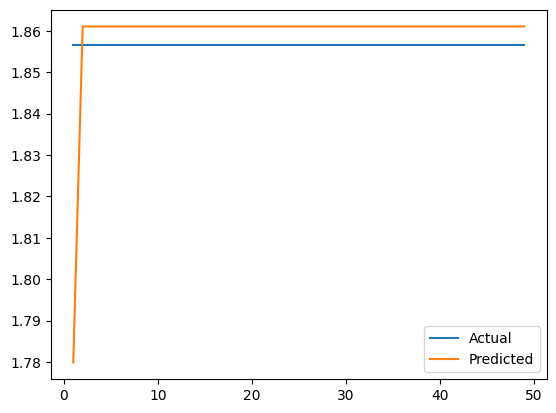

In [94]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [95]:
test_predictions = model10.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,0.638437,0.386221
1,0.723363,0.551124
2,0.515444,0.372479
3,0.529186,0.193834
4,0.406737,0.125125
...,...,...
312,-0.183049,-0.397067
313,-0.186501,-0.259648
314,-0.080785,-0.108488
315,-0.090059,-0.108488


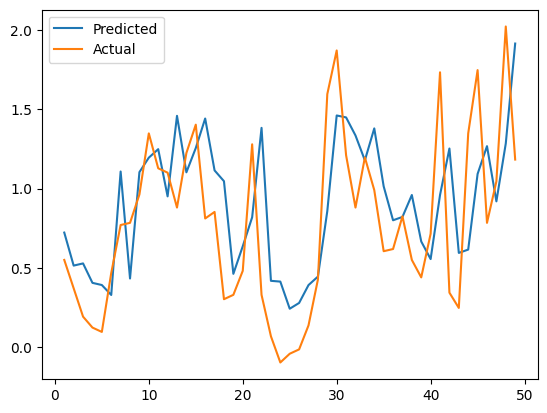

In [96]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()